# Technical analysis: Introduction

09/09/25

Introduction:

- Technical analysis is a method used by traders and investors to evaluate financial markets and make trading decisions based on historical price data, market trends, and various technical indicators.

- It focuses on studying past market behavior to predict future price movements and identify potential trading opportunities.

Principles:

- The core principle of technical analysis is that historical price patterns, trends, and market psychology can provide valuable insights into the future direction of prices.

- Rather than analyzing fundamental factors like company financials or economic indicators, technical analysts primarily rely on charts, price patterns, and statistical tools.

Key components:

- Price charts: Technical analysis often involves examining price charts that display historical price movements over a specific timeframe. Common types of charts include line charts, bar charts, and candlestick charts.

- Trends: Technical analysts analyze price trends, which can be classified as uptrends (higher highs and higher lows), downtrends (lower highs and lower lows), or sideways trends (range-bound markets).

- Support and resistance levels: Support levels are price levels at which buying interest is expected to emerge and potentially prevent further price declines. Resistance levels, on the other hand, are price levels at which selling pressure is expected to increase, potentially preventing further price increases.

- Technical indicators: These are mathematical calculations based on price and volume data that help identify patterns, trends, and potential reversals.

# Technical analysis: Overlays & oscillators

Overlays:

- Overlay indicators, also known as price-based indicators, are technical analysis tools that are plotted directly on the price chart. Unlike oscillators that appear in a separate window or panel below the price chart, overlay indicators are displayed directly on the same chart as the price action.

- They help traders analyze price movements, trends, and potential trading signals without the need to switch between different chart windows or panels.

    - Moving Averages (MA):

        - Moving averages are frequently used as overlay indicators. They smooth out price fluctuations and help identify trends by calculating the average price over a specified period.

        - Moving averages can provide support and resistance levels and generate trading signals when the price crosses above or below the moving average line.

        - $SMA=\frac{P_1+P_2+...+P_n}{n}$

    - EWMA:

        - The EWMA (Exponential Weighted Moving Average) is a type of moving average indicator that assigns more weight to recent price data, making it more responsive to recent price changes compared to other moving averages like the simple moving average (SMA).

        - The calculation of the EWMA involves applying a smoothing factor or weight to each price data point, with higher weights assigned to more recent data.

        - $EWMA_t=\alpha * p_t + (1-\alpha) * EWMA_{t-1}$

            - $\alpha=\frac{2}{N+1}$

    - Bollinger bands:

        - $BB=MA(\frac{H+L+C}{3})\pm2 \sigma$

Oscillators:

- Oscillator indicators are a type of technical analysis tool that fluctuates above and below a centerline, providing information about the momentum, overbought or oversold conditions, and potential trend reversals in the price of a security.

- Unlike overlay indicators that are plotted on the price chart, oscillators typically appear in a separate window or panel below the price chart.

    - Key points:

        - Oscillators are designed to oscillate within a specific range or around a centerline. The values of oscillators can move above and below the centerline, indicating positive or negative momentum.

        - Oscillators often have predefined levels that indicate overbought and oversold conditions. When an oscillator reaches an extreme, it suggests that the price may be overbought / oversold, potentially signaling a trend reversal or a pullback.

    - Relative Strength Index (RSI):

        - The Relative Strength Index (RSI) is probably the most popular oscillator indicator used in technical analysis to measure the speed and change of price movements.

        - It helps traders identify overbought and oversold conditions, potential trend reversals, and generate trading signals.

    - Moving Average Convergence/Divergence:

        - The Moving Average Convergence Divergence (MACD) is a widely used oscillator indicator in technical analysis. It helps traders identify potential trend changes, momentum shifts, and generate trading signals.
        - The MACD oscillator consists of three main components: the MACD line, the signal line, and the histogram.

    - MACD components:

        - MACD Line: Is the difference between two exponential moving averages (EMAs). The most commonly used EMAs are the 12-day EMA and the 26-day EMA.

        - Signal Line: Is a 9-day EMA of the MACD line. It smooths out the MACD line and generates trading signals when it crosses above or below the MACD line.

        - Histogram: The histogram represents the difference between the MACD line and the signal line. Positive histogram bars indicate bullish momentum, while negative bars indicate bearish momentum.

    - Stochastic Oscillator:

        - The Stochastic Oscillator is a momentum indicator used in technical analysis to identify overbought and oversold conditions, potential trend reversals, and generate trading signals.

        - It compares the current closing price of a security to its price range over a specified period, typically 14 periods.

        - $\%K=\frac{\text{close}_t-\text{lowest low}_n}{\text{highest high}_n-\text{lowest low}_n}$

            - $\%D=MA_m(\%K)$
    
- Notes:

    - Both types of indicators are valuable tools for traders as they help identify potential overbought or oversold conditions, gauge momentum, and generate trading signals.

    - However, it's important to remember that technical indicators have limitations and should be used in conjunction with other indicators and analysis techniques to increase the probability of accurate trading decisions.

# Backtesting

Introduction:

- Backtesting involves applying a strategy or predictive model to historical data to determine its accuracy. It can be used to test and compare the viability of trading strategies so traders can employ and tweak successful strategies.

Biases:

- When creating a trading model to be backtested, traders must avoid bias in creating the model. In order to ensure objectivity, the strategy must be tested on several different time periods with an unbiased and representative sample of stocks.

- Another mistake when backtesting is look-ahead bias. Look-ahead bias involves incorporating information into the model being backtested that normally wouldn't be available when the model is actually implemented.

# Ejercicio

Trades at close

Comisión: $0.125\%$

$SL=TP=5\%$

Cash: $\$1 M$

N shares: $50$

No taxes

No leverages

Margin acc: $50\%$

Borrow rate: $0.25\%$

Time frame: $5m$

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta
import optuna

sns.set_theme()

In [11]:
data = pd.read_csv('aapl_5m_train.csv').dropna()
data.head()

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1609770600,0,2021-01-04 14:30:00,133.570007,133.611602,132.389999,132.809997,6624663.0
1,1,1609770900,0,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999,2541553.0
2,2,1609771200,0,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,2492415.0
3,3,1609771500,0,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,1859131.0
4,4,1609771800,0,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,1780105.0


## Código no optimizado

In [12]:
rsi_indicator = ta.momentum.RSIIndicator(data.Close, window=20)
data['rsi'] = rsi_indicator.rsi()

In [13]:
historic = data.dropna()
historic['buy_signal'] = historic.rsi < 20
historic['sell_signal'] = historic.rsi > 80

/var/folders/z2/hrkxn9jx30j3lk9_pr6zzywr0000gn/T/ipykernel_4660/3384102837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['buy_signal'] = historic.rsi < 20
/var/folders/z2/hrkxn9jx30j3lk9_pr6zzywr0000gn/T/ipykernel_4660/3384102837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['sell_signal'] = historic.rsi > 80


In [14]:
historic.head()

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,rsi,buy_signal,sell_signal
19,19,1609776300,0,2021-01-04 16:05:00,130.309997,130.549896,129.660003,129.866699,3030766.0,26.683236,False,False
20,20,1609776600,0,2021-01-04 16:10:00,129.860000,130.239898,129.399993,130.089996,2231137.0,30.749593,False,False
21,21,1609776900,0,2021-01-04 16:15:00,130.080093,130.354995,129.904602,130.324996,1328068.0,34.758166,False,False
22,22,1609777200,0,2021-01-04 16:20:00,130.324005,130.419998,129.930099,129.996398,1233893.0,32.029264,False,False
23,23,1609777500,0,2021-01-04 16:25:00,129.994995,130.206695,129.880004,129.895004,1144809.0,31.232801,False,False


In [15]:
from dataclasses import dataclass

@dataclass
class Operation:
    time: str
    price: float
    stop_loss: float
    take_profit: float
    n_shares: int
    type: str

In [16]:
def get_portfolio_value(cash: float, long_ops: list[Operation], short_ops: list[Operation], current_price:float, n_shares: int) -> float:
    val = cash

    # Add long positions value
    val += len(long_ops) * current_price * n_shares

    # TODO: Add short positions value
    return val

In [17]:
COM = 0.125 / 100
SL = 0.1
TP = 0.1
BORROW_RATE = 0.25 / 100

cash = 1_000_000
n_shares = 200

active_long_positions: list[Operation] = []

portfolio_value = [cash]

for i, row in historic.iterrows():
    # This only works for long positions
    
    # Close positions
    for position in active_long_positions.copy():
        if row.Close > position.take_profit or row.Close < position.stop_loss:
            cash += row.Close * position.n_shares * (1 - COM)
            active_long_positions.remove(position)
    # --- BUY ---
    # Check signal
    if not row.buy_signal:
        portfolio_value.append(get_portfolio_value(cash, active_long_positions, [], row.Close, n_shares))
        continue
    # Do we have enough cash?
    if cash < row.Close * n_shares * (1 + COM):
        portfolio_value.append(get_portfolio_value(cash, active_long_positions, [], row.Close, n_shares))
        continue
    # Discount the cost
    cash -= row.Close * n_shares * (1 + COM)
    # Save the operation as active position
    active_long_positions.append(
        Operation(
        time=row.Datetime,
        price=row.Close,
        take_profit=row.Close * (1 + TP),
        stop_loss=row.Close * (1 - SL),
        n_shares=n_shares,
        type="LONG"
        )
    )

    portfolio_value.append(get_portfolio_value(cash, active_long_positions, [], row.Close, n_shares))

cash += row.Close * len(active_long_positions) * n_shares * (1 - COM)
active_long_positions = []

In [18]:
cash, len(active_long_positions)

(1175409.6117202505, 0)

## Código optimizado

In [19]:
from dataclasses import dataclass

@dataclass
class Operation:
    time: str
    price: float
    stop_loss: float
    take_profit: float
    n_shares: int
    type: str

In [20]:
def get_portfolio_value(cash: float, long_ops: list[Operation], short_ops: list[Operation], current_price:float, n_shares: int) -> float:
    val = cash

    # Add long positions value
    val += len(long_ops) * current_price * n_shares

    # TODO: Add short positions value
    return val

In [21]:
def backtest(data, trial) -> float:
    data = data.copy()

    rsi_window = trial.suggest_int('rsi_window', 5, 50)
    rsi_lower = trial.suggest_int('rsi_lower', 5, 35)
    rsi_upper = trial.suggest_int('rsi_upper', 65, 95)
    stop_loss = trial.suggest_float('stop_loss', 0.01, 0.15)
    take_profit = trial.suggest_float('take_profit', 0.01, 0.15)
    n_shares = trial.suggest_int('n_shares', 50, 500)

    rsi_indicator = ta.momentum.RSIIndicator(data.Close, window=rsi_window)
    data['rsi'] = rsi_indicator.rsi()

    historic = data.dropna()
    historic['buy_signal'] = historic.rsi < rsi_lower
    historic['sell_signal'] = historic.rsi > rsi_upper

    COM = 0.125 / 100
    SL = 0.1
    TP = 0.1
    BORROW_RATE = 0.25 / 100

    cash = 1_000_000

    active_long_positions: list[Operation] = []

    portfolio_value = [cash]

    for i, row in historic.iterrows():
        # This only works for long positions
        
        # Close positions
        for position in active_long_positions.copy():
            if row.Close > position.take_profit or row.Close < position.stop_loss:
                cash += row.Close * position.n_shares * (1 - COM)
                active_long_positions.remove(position)
        # --- BUY ---
        # Check signal
        if not row.buy_signal:
            portfolio_value.append(get_portfolio_value(cash, active_long_positions, [], row.Close, n_shares))
            continue
        # Do we have enough cash?
        if cash < row.Close * n_shares * (1 + COM):
            portfolio_value.append(get_portfolio_value(cash, active_long_positions, [], row.Close, n_shares))
            continue
        # Discount the cost
        cash -= row.Close * n_shares * (1 + COM)
        # Save the operation as active position
        active_long_positions.append(
            Operation(
            time=row.Datetime,
            price=row.Close,
            take_profit=row.Close * (1 + TP),
            stop_loss=row.Close * (1 - SL),
            n_shares=n_shares,
            type="LONG"
            )
        )

        portfolio_value.append(get_portfolio_value(cash, active_long_positions, [], row.Close, n_shares))

    cash += row.Close * len(active_long_positions) * n_shares * (1 - COM)
    active_long_positions = []

    return (cash / 1_000_000) - 1

In [22]:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: backtest(data, trial), n_trials=10)

[I 2025-09-12 00:52:51,007] A new study created in memory with name: no-name-f35fc24a-c9e1-4ec6-b8eb-b9a02cbdf6db
/var/folders/z2/hrkxn9jx30j3lk9_pr6zzywr0000gn/T/ipykernel_4660/3356751777.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['buy_signal'] = historic.rsi < rsi_lower
/var/folders/z2/hrkxn9jx30j3lk9_pr6zzywr0000gn/T/ipykernel_4660/3356751777.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['sell_signal'] = historic.rsi > rsi_upper
[I 2025-09-12 00:52:53,447] Trial 0 finis

In [23]:
study.best_params

{'rsi_window': 47,
 'rsi_lower': 27,
 'rsi_upper': 92,
 'stop_loss': 0.14862062552242064,
 'take_profit': 0.07698558398212413,
 'n_shares': 418}

In [24]:
study.best_value

0.19183910250130976

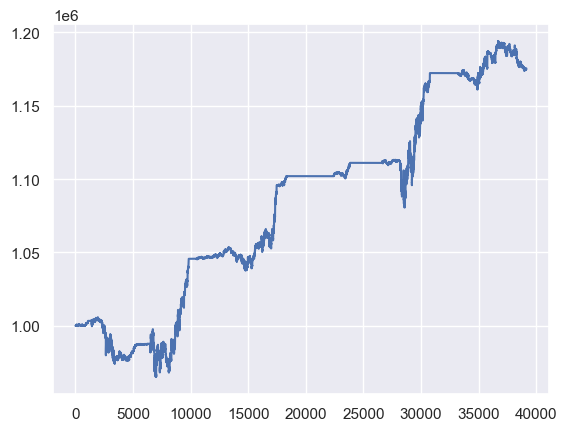

In [25]:
plt.plot(portfolio_value)